In [16]:
#hypothesis 3, model 1

formula = 'dv_response_mean ~ age_targeted + ethnicity_targeted + gender_targeted + education_targeted + religious_affiliation_targeted + occupation_targeted + geographic_location_targeted + party_affiliation_targeted + ideological_affiliation_targeted + political_engagement_targeted'

# Fit the model for all issues 
model = smf.ols(formula, data=df_mt_bm)
result = model.fit()

# Fit the model for digital privacy
model_digital_privacy = smf.ols(formula, data=df_mt_bm_digital_privacy)
result_digital_privacy = model_digital_privacy.fit()

# Fit the model for renewable energy
model_renewable_energy = smf.ols(formula, data=df_mt_bm_renewable_energy)
result_renewable_energy = model_renewable_energy.fit()

# Fit the model for china sanctions
model_china_sanctions = smf.ols(formula, data=df_mt_bm_china_sanctions)
result_china_sanctions = model_china_sanctions.fit()

# Fit the model for nato support
model_nato_support = smf.ols(formula, data=df_mt_bm_nato_support)
result_nato_support = model_nato_support.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       dv_response_mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6786
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.745
Time:                        13:50:27   Log-Likelihood:                -33191.
No. Observations:                6821   AIC:                         6.640e+04
Df Residuals:                    6810   BIC:                         6.648e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

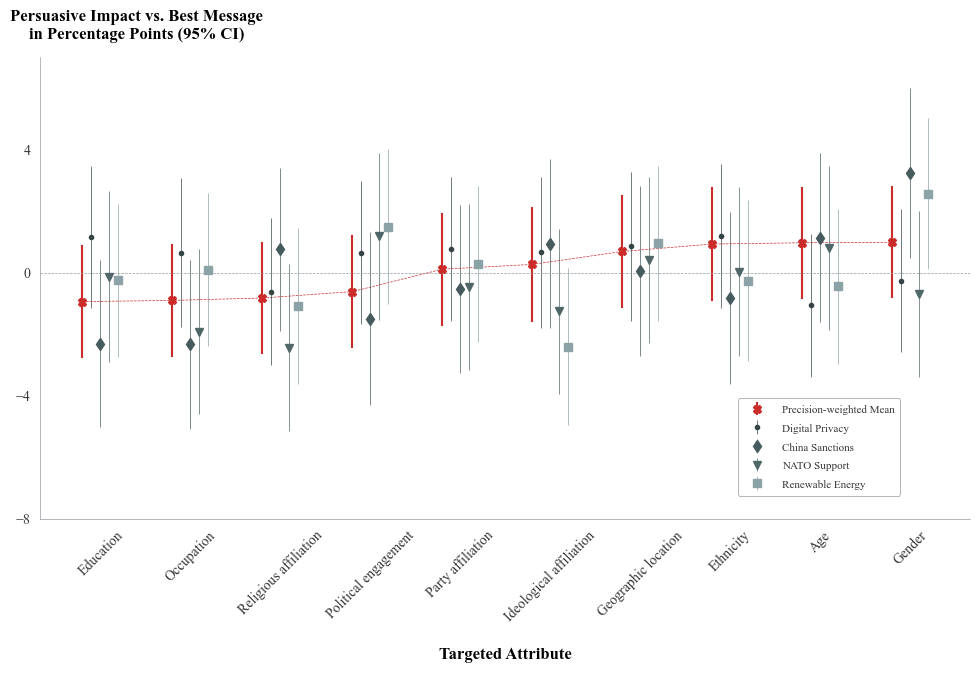

In [17]:
#FIGURE 4
# Set the font to "Times New Roman"
plt.rcParams["font.family"] = "Times New Roman"

# Define constants
RESULTS = [result, result_digital_privacy, result_china_sanctions, result_nato_support, result_renewable_energy]
LABELS = ['Precision-weighted Mean', 'Digital Privacy', 'China Sanctions', 'NATO Support', 'Renewable Energy']
COLOR_MAP = ['#CB2C2A', '#354546', '#465B5D', '#4F6769', '#8BA3A7']
MARKERS = ['X', '.', 'd', 'v', 's']

# Calculate the order of variables based on 'Precision-weighted Mean'
mean_coef = RESULTS[0].params[1:]  # Precision-weighted Mean coefficients
sort_order = mean_coef.sort_values().index  # Sort by value and get the sorted variable names

# Set the plot dimensions
fig, ax = plt.subplots(figsize=(12,6))

# Use floating point numbers for the x_pos array
x_pos = np.arange(len(sort_order), dtype=float) - len(RESULTS)/2 * 0.1

for result_i, label, color, marker in zip(RESULTS, LABELS, COLOR_MAP, MARKERS):
    # Get the coefficients and confidence intervals excluding intercept
    coefficients = result_i.params[1:].loc[sort_order]  # Order the coefficients
    cis = result_i.conf_int().iloc[1:].loc[sort_order]  # Order the confidence intervals
    
    # Create a DataFrame with the coefficients and confidence intervals
    df_coef = pd.DataFrame({'coef': coefficients, 'lower': cis[0], 'upper': cis[1]})
    
    # Plot coefficients with error bars and add coefficient labels
    eb = ax.errorbar(x_pos + 0.05, df_coef['coef'], 
                yerr=(df_coef['coef'] - df_coef['lower'], df_coef['upper'] - df_coef['coef']), 
                fmt=marker, color=color, ecolor=color, capsize=0, label=label)

    # Change linewidth of error bars for non 'Precision-weighted Mean' labels
    if label != 'Precision-weighted Mean':
        eb[-1][0].set_linewidth(0.5)  # Here '-1' is used to access the error bar line collection
    
    # Connect points with dashed line for 'Precision-weighted Mean' only
    if label == 'Precision-weighted Mean':
        ax.plot(x_pos + 0.05, df_coef['coef'], color=color, linestyle='dashed', linewidth=0.5)

    # Update x_pos for next plot
    x_pos += 0.1

# Configure the plot
plt.axhline(0, color='#94999E', linestyle='--', linewidth=0.5)
plt.ylim(-8, max(df_coef['upper']+2))

ax.text(0.4, 8, 'Persuasive Impact vs. Best Message\nin Percentage Points (95% CI)', rotation=0, va='center', ha='center', fontweight='bold', fontsize=12)
ax.set_xlabel('Targeted Attribute', fontsize=12, fontweight='bold', labelpad=17)
ax.set_xticks(np.arange(len(sort_order)))
new_xticklabels = [label.replace('_targeted', '').replace('_', ' ').capitalize() for label in sort_order]
ax.set_xticklabels(new_xticklabels, rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#94999E')
ax.spines['bottom'].set_color('#94999E')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.tick_params(colors='#333333')
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
ax.tick_params(left=False)
ax.tick_params(bottom=False)

# Configure the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(loc=(0.75, 0.05), edgecolor='#94999E')
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)

for text in legend.get_texts():
    text.set_color('#333333')
    text.set_fontsize(8)

# Display the plot
plt.show()

# Save the figure as a PDF
fig.savefig('figure4.pdf', format='pdf', bbox_inches='tight')